In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
import pylab as plb
import numpy as np
import scipy as sp
import flylib as flb
import group_data as gd
import plotfuncs as plf
plb.rcParams['pdf.fonttype'] = 42
plb.rcParams['image.interpolation'] = 'nearest'
plb.rcParams['image.aspect'] = 'auto'
plb.rcParams['image.cmap'] = 'BrBG'
import h5py
demo_mode = False

In [3]:
filter_mode = 'non_linear'

In [4]:
saccade_tables_22H05 = h5py.File('detected_saccades_nl_22H05.hdf5','r')

In [5]:
sort_sig_22H05 = saccade_tables_22H05['Ph2'][:,20] - np.mean(saccade_tables_22H05['Ph2'][:,:10],axis = 1)

In [6]:
sort_idx_22H05 = np.argsort(sort_sig_22H05,axis = 0)

In [7]:
sorted_saccades_22H05 = dict()
[sorted_saccades_22H05.update({sig:np.array(saccade_tables_22H05[sig])[sort_idx_22H05]}) for 
                                                sig in saccade_tables_22H05.keys()];

In [9]:
xi = gd.get_xio('pth_roll_0')
peak_times = np.array([xi[x] for x in sorted_saccades_22H05['peak']])

In [10]:
stim_mask = (peak_times > 0) & (peak_times < 3)
baseline_mask = (peak_times > -3) & (peak_times < 0)

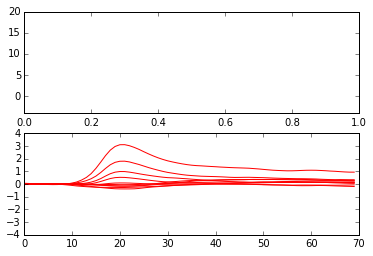

In [87]:
trial_mask = np.array(sorted_saccades_22H05['trial_names']) == 'pth_roll_90'

sig = 'i1'
#bsln = trial_mask & baseline_mask
#stim = trial_mask & stim_mask
bsln = baseline_mask
stim = stim_mask

bsln_smtrx = sorted_saccades_22H05[sig][bsln,:] - np.mean(sorted_saccades_22H05[sig][bsln,:10],axis = 1)[:,None]
stim_smtrx = sorted_saccades_22H05[sig][stim,:] - np.mean(sorted_saccades_22H05[sig][stim,:10],axis = 1)[:,None]

bkin_smtrx = sorted_saccades_22H05['Ph1'][bsln,:] - np.mean(sorted_saccades_22H05['Ph1'][bsln,:10],axis = 1)[:,None]
skin_smtrx = sorted_saccades_22H05['Ph1'][stim,:] - np.mean(sorted_saccades_22H05['Ph1'][stim,:10],axis = 1)[:,None]

qranges_bsln = np.linspace(0,np.shape(bsln_smtrx)[0],11).astype(int)[::-1]
qranges_stim = np.linspace(0,np.shape(stim_smtrx)[0],11).astype(int)[::-1]

plb.subplot(2,1,1)
for qstart,qend in zip(qranges_bsln[1:],qranges_bsln[:-1]):
    dta = bsln_smtrx[qstart:qend,:].copy()
    #plb.hist(np.mean(dta[:,18:22],axis = 1),bins = 100)
    #dta -= np.mean(dta[:,:10],axis = 1)[:,None]
    #plb.plot(np.mean(dta,axis = 0),color = 'k')
plb.gca().set_ybound(-4,20)

plb.subplot(2,1,2)
for qstart,qend in zip(qranges_stim[1:],qranges_stim[:-1]):
    dta = stim_smtrx[qstart:qend,:].copy()
    #dta -= np.mean(dta[:,:10],axis = 1)[:,None]
    plb.plot(np.mean(dta,axis = 0),color = 'r')
plb.gca().set_ybound(-4,4)

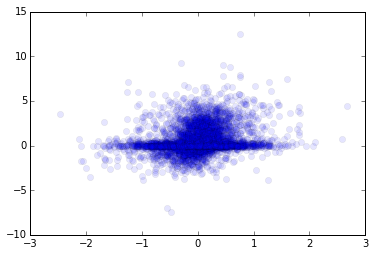

In [69]:
plb.plot(res,np.mean(stim_smtrx[:,18:22],axis = 1),'o',alpha = 0.1)

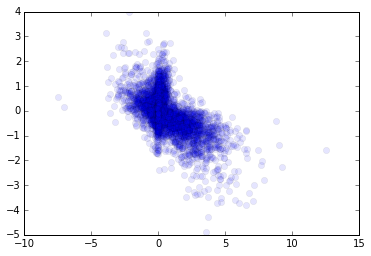

In [88]:
plb.plot(np.mean(stim_smtrx[:,18:22],axis = 1),
         np.mean(skin_smtrx[:,18:22],axis = 1),'o',ms = 6.5,alpha = 0.1)

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

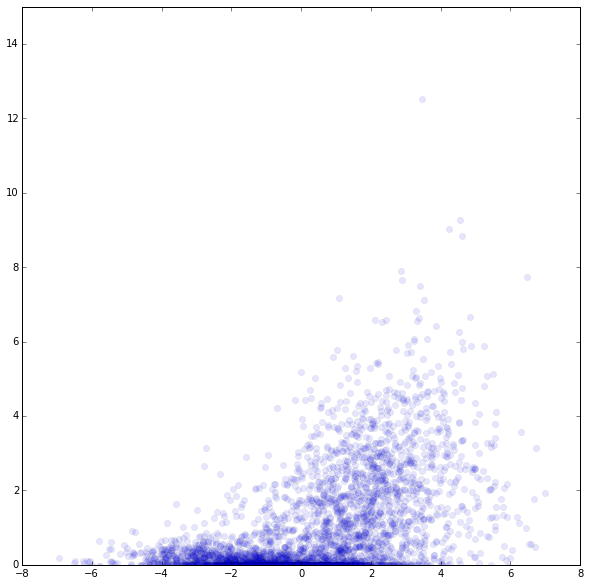

In [86]:
%config InlineBackend.figure_format = 'png' 
plb.figure(figsize = (10,10))
plb.plot(np.mean(skin_smtrx[:,18:22],axis = 1),
         np.mean(stim_smtrx[:,18:22],axis = 1),'o',ms = 6.5,alpha = 0.1,lw = 0)
#plb.plot(np.mean(bkin_smtrx[:,18:22],axis = 1),
#         np.mean(bsln_smtrx[:,18:22],axis = 1),'o',ms = 6.5,alpha = 0.5,lw = 0)
plb.gca().set_rasterized(True)
plb.gca().set_ybound(0,15)

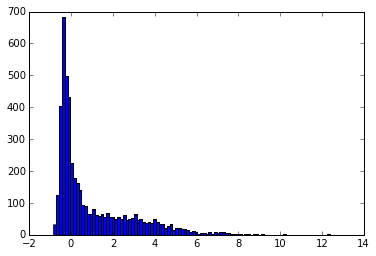

In [31]:
lns = plb.hist(np.mean(stim_smtrx[:,18:22],axis = 1),bins = 100)

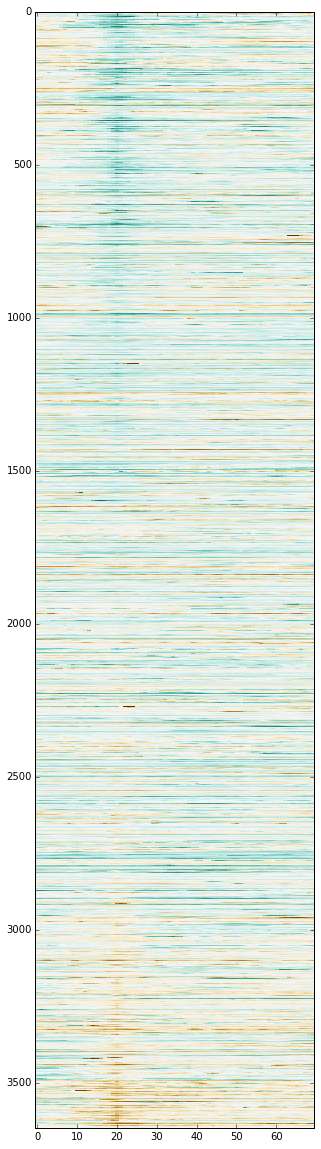

In [32]:
plb.figure(figsize = (5,20))
plb.imshow(bkin_smtrx,aspect = 'auto',vmin = -4,vmax = 4)